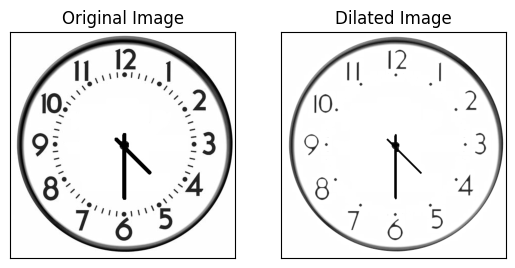

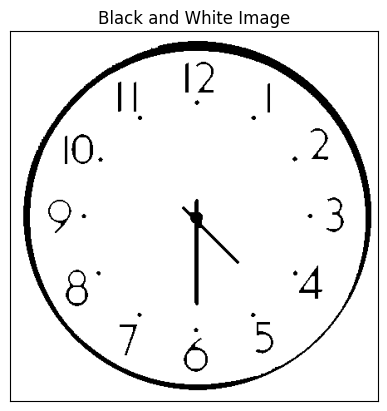

clock:  [(135.00000034162267, 1.0), (0.0, 226.0)]
mins ; 30.000000683245354


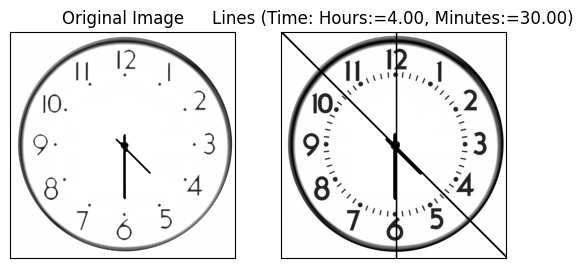

In [51]:
import cv2
import numpy as np
from math import atan2, degrees
from matplotlib import pyplot as plt

# Define the calculate_time function to determine time based on angles
def calculate_time(hours_angle, minutes_angle):
    total_hours = None
    total_minutes = None
    if hours_angle is not None:
        total_hours = ((hours_angle % 360) / 360) * 12
    if minutes_angle is not None:
        total_minutes = ((minutes_angle % 360) / 360) * 60
    if total_minutes == 0:
        min = (total_hours % 1) * 60
        print("mins ;", min)
        total_minutes = min
        total_hours = int(total_hours)
    return total_hours, total_minutes

# Load the image for the initial time
image = cv2.imread('2-2.jpg', cv2.IMREAD_GRAYSCALE)

# Create a copy of the image for drawing lines
image_with_lines = image.copy()

# Define a kernel for dilation
kernel = np.ones((4, 4), np.uint8)  # You can adjust the size of the kernel as needed

# Apply dilation
dilated_image = cv2.dilate(image, kernel, iterations=1)

# Display the original and dilated images
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image'), plt.xticks([]), plt.yticks([])

plt.show()
image = dilated_image

# Apply a binary threshold
_, black_white_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Display the black and white image
plt.imshow(black_white_image, cmap='gray')
plt.title('Black and White Image')
plt.xticks([]), plt.yticks([])

plt.show()

# Apply Hough Line Transform
edges = cv2.Canny(image, 30, 150)
lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=120)

# Convert lines to angles and lengths
clock_hands = []  # A list to store angles and lengths of lines as tuples
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        angle = degrees(theta)
        length = abs(rho)
        clock_hands.append((angle, length))

# Sort the clock hands by length (smaller first)
clock_hands.sort(key=lambda x: x[1])

print("clock: ", clock_hands)

# Pick the two shortest hands as hour and minute hands
if len(clock_hands) >= 2:
    hour_hand = clock_hands[0]
    minute_hand = clock_hands[len(clock_hands)-1]
else:
    hour_hand = None
    minute_hand = None

# Get the detected time for the initial image
hour, minute = calculate_time(hour_hand[0], minute_hand[0])

# Draw the lines on the copy of the image
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Draw lines in red

# Display the image with lines and the calculated time
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(image_with_lines, cmap='gray')
if hour is not None and minute is not None:
    plt.title(f'Lines (Time: Hours:={hour:.2f}, Minutes:={minute:.2f})')
else:
    plt.title('Image with Lines (Hands not detected)')
plt.xticks([]), plt.yticks([])

plt.show()
